In [1]:
import pandas as pd
import os


In [2]:

def get_video_data(host_folder) -> pd.DataFrame:
    # List files in output/{asset_id} dir
    df_list = []
    files = os.listdir(host_folder)
    for file in files:
        if file.endswith('.json'):
            print(file)
            path = f'{host_folder}/{file}'
            df_data = pd.read_json(path)
            df_list.append(df_data)

    df = pd.concat(df_list)
    
    return df
    
    
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    # Create an empty list to store the parsed data
    inner_data = []

    for index, row in df.iterrows():
        # Load the JSON data from the 'data' column
        data = row['data']
        
        for result in data['results']:
            result['frame_number'] = data['frame_number']
            result['original_frame'] = data['original_frame']
            result['s3_path'] = data['s3_path']
            result['fps'] = row['fps']
            
            result['total_frames'] = row['total_frames']
            result['annotated_video'] = row['annotated_video']
            
            inner_data.append(result)

    # Create a DataFrame from the flattened list of dictionaries
    data_df = pd.json_normalize(inner_data)

    return data_df





In [ ]:
# df_c = clean_data(df)
# print(df_c.shape)
# df_c.head()

In [ ]:
# df_join = df.join(df_c)
# # Remove "data" column from the DataFrame
# df_join = df_join.drop(columns=['data'])
# print(df_join.shape)
# df_join.head()

In [3]:
import pandas as pd

In [4]:
data_path = '../data/outputs/data.csv'


tasks_df = pd.read_csv(data_path)
tasks_df.head()


,id,video_id,status,chunk_id,total_frames,fps,remote_data_path,annotated_video_path
0,927839243,5049e5f6-ec91-4afb-b2f5-a63a991a7993,pending,0,4350,29,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...
1,540969006,5049e5f6-ec91-4afb-b2f5-a63a991a7993,pending,1,4350,29,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...
2,748491783,5049e5f6-ec91-4afb-b2f5-a63a991a7993,pending,2,4350,29,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...
3,728784689,5049e5f6-ec91-4afb-b2f5-a63a991a7993,pending,3,4350,29,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...
4,243874323,5049e5f6-ec91-4afb-b2f5-a63a991a7993,pending,4,4350,29,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...


In [8]:

video_id = '5049e5f6-ec91-4afb-b2f5-a63a991a7993'
df_target = tasks_df[tasks_df['video_id'] == video_id ]


df_target.shape

(5, 8)

In [9]:
df_target.head()

,id,video_id,status,chunk_id,total_frames,fps,remote_data_path,annotated_video_path
0,927839243,5049e5f6-ec91-4afb-b2f5-a63a991a7993,pending,0,4350,29,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...
1,540969006,5049e5f6-ec91-4afb-b2f5-a63a991a7993,pending,1,4350,29,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...
2,748491783,5049e5f6-ec91-4afb-b2f5-a63a991a7993,pending,2,4350,29,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...
3,728784689,5049e5f6-ec91-4afb-b2f5-a63a991a7993,pending,3,4350,29,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...
4,243874323,5049e5f6-ec91-4afb-b2f5-a63a991a7993,pending,4,4350,29,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...


In [30]:
# minip
from minio import Minio

client = Minio("0.0.0.0:9000",  # Replace with your MinIO storage address
    access_key = "minioadmin",   # Replace with your access key
    secret_key = "minioadmin",    # Replace with your secret key
    secure = False
)

bucket_name = "my-bucket"

In [11]:
# Iterate over rows and convert each row to a dictionary
host_folder = './tmp/'

for index, row in df_target.iterrows():
    row_dict = row.to_dict()
    
    filename = row_dict['remote_data_path'].split("/")[-1]
    file =  row_dict['remote_data_path']
    # Process data
    output_file_path =  f'./tmp/{filename}'
    client.fget_object(bucket_name, file, output_file_path)    
    
df_tasks = get_video_data( host_folder =  host_folder)

df_tasks.head()

tmp8_r9nace_chunk_2_of_4350.mp4_results.json
tmp8_r9nace_chunk_3_of_4350.mp4_results.json
tmp8_r9nace_chunk_1_of_4350.mp4_results.json
tmp8_r9nace_chunk_0_of_4350.mp4_results.json
tmp8_r9nace_chunk_4_of_4350.mp4_results.json


,annotated_video,total_frames,data,fps
0,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,4350,"{'results': [{'name': 'car', 'class': 2, 'conf...",29
1,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,4350,"{'results': [{'name': 'car', 'class': 2, 'conf...",29
2,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,4350,"{'results': [{'name': 'car', 'class': 2, 'conf...",29
3,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,4350,"{'results': [{'name': 'car', 'class': 2, 'conf...",29
4,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,4350,"{'results': [{'name': 'car', 'class': 2, 'conf...",29


In [12]:
df_c = clean_data(df_tasks)
print(df_c.shape)
df_c.head()

(135300, 14)


,name,class,confidence,track_id,frame_number,original_frame,s3_path,fps,total_frames,annotated_video,box.x1,box.y1,box.x2,box.y2
0,car,2,0.84253,1,0,tmp8_r9nace_chunk_2_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,334.07565,48.26264,405.30865,87.45946
1,car,2,0.55709,3,0,tmp8_r9nace_chunk_2_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,375.12015,38.97644,418.67746,64.04517
2,car,2,0.66877,4,0,tmp8_r9nace_chunk_2_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,411.59988,31.60214,434.65320,51.49309
3,bus,5,0.13255,56,0,tmp8_r9nace_chunk_2_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,68.63795,67.93243,316.96194,224.10532
4,person,0,0.38228,50,0,tmp8_r9nace_chunk_2_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,259.65268,115.14301,310.29587,199.90434


In [23]:
# Save to csv
df_c.to_csv('./tmp/clean_tmps.csv', index=False)

## READ DATA

In [12]:
# Load csv again
import pandas as pd

df_c = pd.read_csv('./tmp/clean_tmps.csv')
print(df_c.shape)

(135300, 17)


In [13]:
df_c[df_c['name'] == 'car'].shape

(91493, 17)

In [14]:
df_c['original_frame'][0]

'tmp8_r9nace_chunk_0_of_4350_annotated_images/tmp8_r9nace_chunk_0_of_4350_annotated_0.jpg'

In [15]:
import re

def extract_chunk_and_annotated(filename: str) -> dict:
    # Use regular expressions to find the chunk and annotated values
    chunk_match = re.search(r'chunk_(\d+)', filename)
    annotated_match = re.search(r'annotated_(\d+)', filename)
    
    if chunk_match and annotated_match:
        chunk_value = int(chunk_match.group(1))
        annotated_value = int(annotated_match.group(1))
        return {'chunk': chunk_value, 'annotated': annotated_value}
    else:
        raise ValueError("Chunk or annotated value not found in the filename")

# Example usage
result = extract_chunk_and_annotated(df_c['original_frame'][0])
print(result)

{'chunk': 0, 'annotated': 0}


In [16]:
df_c['metric'] = df_c['original_frame'].apply(lambda x : extract_chunk_and_annotated(x))

# If you want to split the dictionary into separate columns
df_c['chunk'] = df_c['metric'].apply(lambda x: x['chunk'])
df_c['annotated'] = df_c['metric'].apply(lambda x: x['annotated'])

# Optionally drop the 'metric' column if not needed anymore
df_c.drop(columns=['metric'], inplace=True)

In [17]:
df_c.head()

,index,name,class,confidence,track_id,frame_number,original_frame,s3_path,fps,total_frames,annotated_video,box.x1,box.y1,box.x2,box.y2,chunk,annotated
0,81718,car,2,0.88141,1,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,334.22635,47.72169,405.06653,87.59734,0,0
1,81719,car,2,0.64626,3,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,373.91360,38.47799,418.34357,64.73465,0,0
2,81720,car,2,0.63741,4,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,412.09094,31.29582,435.18265,51.47420,0,0
3,81721,bus,5,0.49716,85,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,76.33698,65.57970,320.43726,227.89771,0,0
4,81722,car,2,0.68225,158,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,335.12869,25.58342,372.05667,42.38772,0,0


In [18]:
print(df_c[df_c['chunk'] == 0]['annotated'].max())
print(df_c[df_c['chunk'] == 1]['annotated'].max())
print(df_c[df_c['chunk'] == 2]['annotated'].max())
print(df_c[df_c['chunk'] == 3]['annotated'].max())

4349
4349
4349
4349


In [19]:
import matplotlib.pyplot as plt


In [20]:
# Sort the DataFrame by 'chunk' and 'annotated'
df_c.sort_values(by=['chunk', 'annotated'], inplace=True, ascending=True)
df_c.reset_index(inplace=True)

In [21]:
df_c.head()

,level_0,index,name,class,confidence,track_id,frame_number,original_frame,s3_path,fps,total_frames,annotated_video,box.x1,box.y1,box.x2,box.y2,chunk,annotated
0,0,81718,car,2,0.88141,1,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,334.22635,47.72169,405.06653,87.59734,0,0
1,1,81719,car,2,0.64626,3,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,373.91360,38.47799,418.34357,64.73465,0,0
2,2,81720,car,2,0.63741,4,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,412.09094,31.29582,435.18265,51.47420,0,0
3,3,81721,bus,5,0.49716,85,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,76.33698,65.57970,320.43726,227.89771,0,0
4,4,81722,car,2,0.68225,158,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,335.12869,25.58342,372.05667,42.38772,0,0


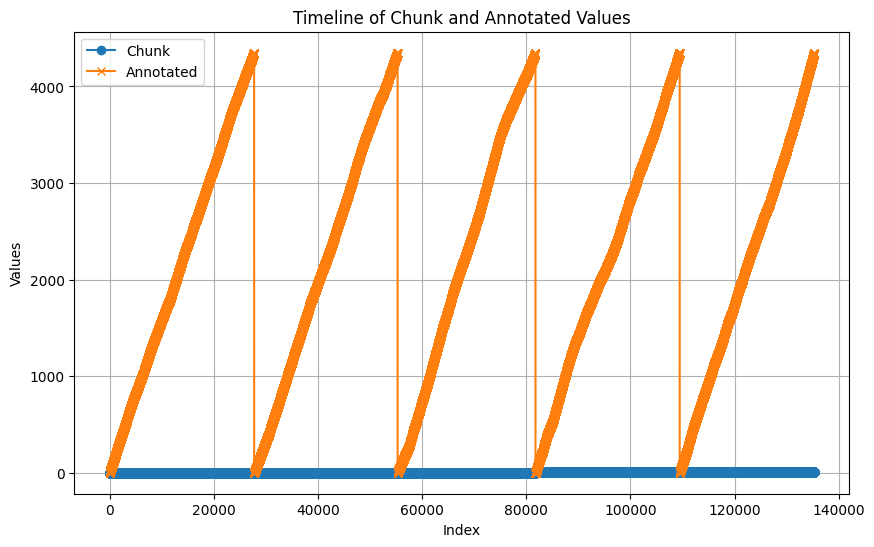

In [22]:

# Plot the timeline
plt.figure(figsize=(10, 6))
plt.plot(df_c.index, df_c['chunk'], marker='o', label='Chunk')
plt.plot(df_c.index, df_c['annotated'], marker='x', label='Annotated')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Timeline of Chunk and Annotated Values')
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

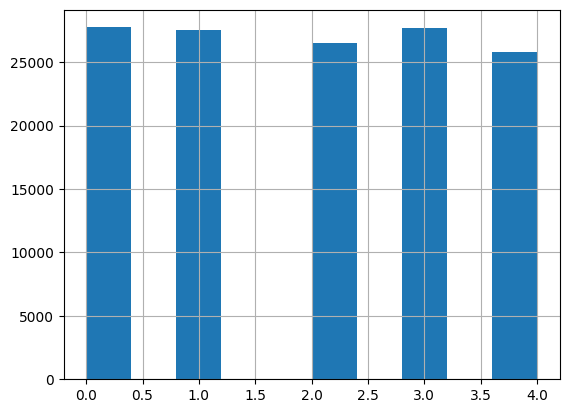

In [23]:
df_c['chunk'].hist()

In [24]:
# Initialize 'fixed_annotated' with the same values as 'annotated'
df_c['fixed_annotated'] = df_c['annotated']

# Calculate the cumulative max annotated for each chunk
max_annotated_per_chunk = df_c.groupby('chunk')['annotated'].max().shift(fill_value=0).cumsum()
chunk_offsets = max_annotated_per_chunk.to_dict()

# Adjust the fixed_annotated values
cumulative_offset = 0
previous_chunk = -1

for index, row in df_c.iterrows():
    current_chunk = row['chunk']
    if current_chunk != previous_chunk:
        cumulative_offset = chunk_offsets[current_chunk]
        previous_chunk = current_chunk
    df_c.at[index, 'fixed_annotated'] += cumulative_offset

# Verify the result
df_c.head(20)

,level_0,index,name,class,confidence,track_id,frame_number,original_frame,s3_path,fps,total_frames,annotated_video,box.x1,box.y1,box.x2,box.y2,chunk,annotated,fixed_annotated
0,0,81718,car,2,0.88141,1,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,334.22635,47.72169,405.06653,87.59734,0,0,0
1,1,81719,car,2,0.64626,3,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,373.91360,38.47799,418.34357,64.73465,0,0,0
2,2,81720,car,2,0.63741,4,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,412.09094,31.29582,435.18265,51.47420,0,0,0
3,3,81721,bus,5,0.49716,85,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,76.33698,65.57970,320.43726,227.89771,0,0,0
4,4,81722,car,2,0.68225,158,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,335.12869,25.58342,372.05667,42.38772,0,0,0
5,5,81723,car,2,0.88181,1,1,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,334.34747,47.67103,404.97168,87.86635,0,1,1
6,6,81724,car,2,0.65739,3,1,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,374.40350,38.54716,418.25998,64.58204,0,1,1
7,7,81725,car,2,0.60708,4,1,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,412.70770,31.46589,435.36234,51.64383,0,1,1
8,8,81726,bus,5,0.42225,85,1,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,77.08276,65.55608,317.77142,230.19493,0,1,1
9,9,81727,car,2,0.67545,158,1,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,335.09421,25.66038,372.20819,42.39367,0,1,1


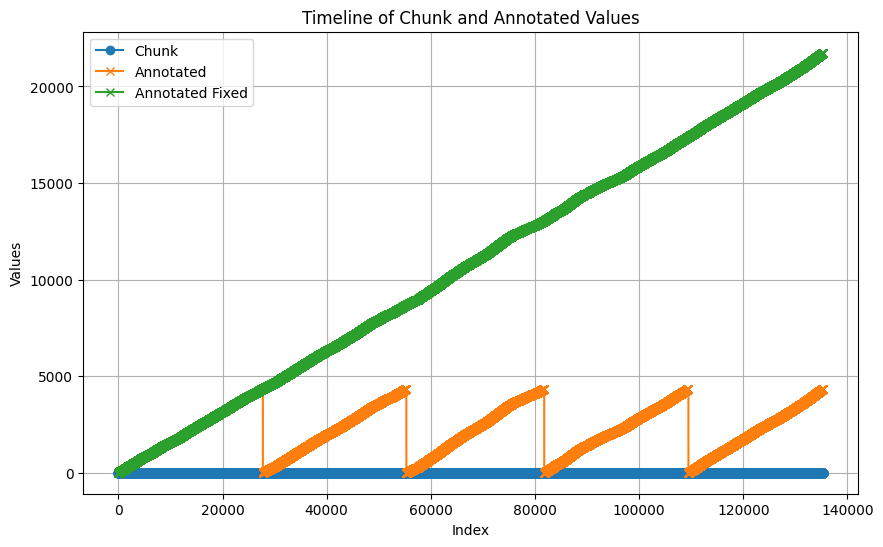

In [13]:
# Plot the timeline
plt.figure(figsize=(10, 6))
plt.plot(df_c.index, df_c['chunk'], marker='o', label='Chunk')
plt.plot(df_c.index, df_c['annotated'], marker='x', label='Annotated')
plt.plot(df_c.index, df_c['fixed_annotated'], marker='x', label='Annotated Fixed')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Timeline of Chunk and Annotated Values')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
df_c[df_c['chunk'] == 3]

,level_0,index,name,class,confidence,track_id,frame_number,original_frame,s3_path,fps,total_frames,annotated_video,box.x1,box.y1,box.x2,box.y2,chunk,annotated,fixed_annotated
81777,81777,26477,car,2,0.76745,1,0,tmp8_r9nace_chunk_3_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_3_of_4350_annotated.mp4,333.71887,47.97743,403.74744,89.38133,3,0,13047
81778,81778,26478,car,2,0.54708,3,0,tmp8_r9nace_chunk_3_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_3_of_4350_annotated.mp4,373.17416,38.21548,418.57983,63.68131,3,0,13047
81779,81779,26479,car,2,0.59679,4,0,tmp8_r9nace_chunk_3_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_3_of_4350_annotated.mp4,410.68213,31.33529,434.96704,50.96645,3,0,13047
81780,81780,26480,truck,7,0.48604,85,0,tmp8_r9nace_chunk_3_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_3_of_4350_annotated.mp4,77.78449,64.52846,318.62054,223.43161,3,0,13047
81781,81781,26481,car,2,0.64434,93,0,tmp8_r9nace_chunk_3_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_3_of_4350_annotated.mp4,335.16104,25.47108,370.72980,42.31997,3,0,13047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109463,109463,54163,car,2,0.66861,3,4349,tmp8_r9nace_chunk_3_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_3_of_4350_annotated.mp4,373.88541,38.58359,418.44894,63.93723,3,4349,17396
109464,109464,54164,car,2,0.63138,4,4349,tmp8_r9nace_chunk_3_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_3_of_4350_annotated.mp4,410.33173,31.24520,434.90189,51.58936,3,4349,17396
109465,109465,54165,truck,7,0.49148,85,4349,tmp8_r9nace_chunk_3_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_3_of_4350_annotated.mp4,74.54683,65.89100,317.45044,233.28088,3,4349,17396
109466,109466,54166,car,2,0.69805,124,4349,tmp8_r9nace_chunk_3_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_3_of_4350_annotated.mp4,335.56973,25.38542,373.36792,42.40527,3,4349,17396


In [15]:
# Calculate the total length of the video in seconds
total_frames = df_c['fixed_annotated'].max()
total_seconds = total_frames / 30  # Assuming 30 fps

# Function to convert seconds to HH:MM:ss format
def seconds_to_hhmmss(seconds):
    hh = int(seconds // 3600)
    mm = int((seconds % 3600) // 60)
    ss = int(seconds % 60)
    return f"{hh:02}:{mm:02}:{ss:02}"

# Create the 'timestamp' column
df_c['timestamp'] = df_c['fixed_annotated'].apply(lambda x: seconds_to_hhmmss(x / 30))


In [39]:
df_c.tail()

,level_0,index,name,class,confidence,track_id,frame_number,original_frame,s3_path,fps,total_frames,annotated_video,box.x1,box.y1,box.x2,box.y2,chunk,annotated,fixed_annotated,timestamp
135295,135295,135295,car,2,0.87397,1,4349,tmp8_r9nace_chunk_4_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_4_of_4350_annotated.mp4,334.08524,47.86750,405.23352,86.79787,4,4349,21745,00:12:04
135296,135296,135296,car,2,0.63603,3,4349,tmp8_r9nace_chunk_4_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_4_of_4350_annotated.mp4,372.81845,38.48228,418.48779,65.22478,4,4349,21745,00:12:04
135297,135297,135297,car,2,0.62703,4,4349,tmp8_r9nace_chunk_4_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_4_of_4350_annotated.mp4,410.21280,30.88890,434.93839,51.35523,4,4349,21745,00:12:04
135298,135298,135298,truck,7,0.67872,85,4349,tmp8_r9nace_chunk_4_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_4_of_4350_annotated.mp4,73.38110,65.69290,327.41281,227.01698,4,4349,21745,00:12:04
135299,135299,135299,car,2,0.69682,158,4349,tmp8_r9nace_chunk_4_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_4_of_4350_annotated.mp4,334.99936,25.41467,371.60590,42.34750,4,4349,21745,00:12:04


In [16]:
# Remove repeted rows based on frame_number

df_c_rr = df_c.drop_duplicates(subset=['frame_number', 'class', 'track_id'], keep='first')

print(df_c.shape)
print(df_c_rr.shape)

(135300, 20)
(74837, 20)


In [17]:
df_c_rr.head()

,level_0,index,name,class,confidence,track_id,frame_number,original_frame,s3_path,fps,total_frames,annotated_video,box.x1,box.y1,box.x2,box.y2,chunk,annotated,fixed_annotated,timestamp
0,0,81718,car,2,0.88141,1,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,334.22635,47.72169,405.06653,87.59734,0,0,0,00:00:00
1,1,81719,car,2,0.64626,3,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,373.91360,38.47799,418.34357,64.73465,0,0,0,00:00:00
2,2,81720,car,2,0.63741,4,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,412.09094,31.29582,435.18265,51.47420,0,0,0,00:00:00
3,3,81721,bus,5,0.49716,85,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,76.33698,65.57970,320.43726,227.89771,0,0,0,00:00:00
4,4,81722,car,2,0.68225,158,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,335.12869,25.58342,372.05667,42.38772,0,0,0,00:00:00


In [18]:
# Group by 'timestamp' and convert to a dictionary
# grouped = df_c.groupby('timestamp').apply(lambda x: x.to_dict(orient='records')).to_dict()



In [31]:
df_c_rrr = df_c_rr[['confidence', 'frame_number', 'track_id', 'name', 'class', 's3_path', 'timestamp']]

all_classes = df_c_rrr['class'].unique()
all_names = df_c_rrr['name'].unique()
print(all_classes)
print(all_names)

[ 2  5  0  7  4  3  1 21  9 19 16 17  6 24 26 28  8 20 10]
['car' 'bus' 'person' 'truck' 'airplane' 'motorcycle' 'bicycle' 'bear'
 'traffic light' 'cow' 'dog' 'horse' 'train' 'backpack' 'handbag'
 'suitcase' 'boat' 'elephant' 'fire hydrant']


In [37]:
import json

# Assuming df_c_rrr is your DataFrame
def aggregate_groups(group):
    return {
        "names": group["name"].unique().tolist(),
        "classes": group["class"].unique().tolist(),
        "data": group.to_dict(orient="records")
    }

grouped = df_c_rrr.groupby("timestamp", group_keys=False).apply(aggregate_groups).to_dict()
print(grouped.keys())


dict_keys(['00:00:00', '00:00:01', '00:00:02', '00:00:03', '00:00:04', '00:00:05', '00:00:06', '00:00:07', '00:00:08', '00:00:09', '00:00:10', '00:00:11', '00:00:12', '00:00:13', '00:00:14', '00:00:15', '00:00:16', '00:00:17', '00:00:18', '00:00:19', '00:00:20', '00:00:21', '00:00:22', '00:00:23', '00:00:24', '00:00:25', '00:00:26', '00:00:27', '00:00:28', '00:00:29', '00:00:30', '00:00:31', '00:00:32', '00:00:33', '00:00:34', '00:00:35', '00:00:36', '00:00:37', '00:00:38', '00:00:39', '00:00:40', '00:00:41', '00:00:42', '00:00:43', '00:00:44', '00:00:45', '00:00:46', '00:00:47', '00:00:48', '00:00:49', '00:00:50', '00:00:51', '00:00:52', '00:00:53', '00:00:54', '00:00:55', '00:00:56', '00:00:57', '00:00:58', '00:00:59', '00:01:00', '00:01:01', '00:01:02', '00:01:03', '00:01:04', '00:01:05', '00:01:06', '00:01:07', '00:01:08', '00:01:09', '00:01:10', '00:01:11', '00:01:12', '00:01:13', '00:01:14', '00:01:15', '00:01:16', '00:01:17', '00:01:18', '00:01:19', '00:01:20', '00:01:21', '00:0

/var/folders/cp/wr66qlws0zd28j5dnx0fxhz00000gn/T/ipykernel_19321/1204548934.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_c_rrr.groupby("timestamp", group_keys=False).apply(aggregate_groups).to_dict()


In [40]:
all_classes = df_c_rrr['class'].unique()
all_names = df_c_rrr['name'].unique()

final_data = {
    "ground_detections": grouped,
    "original_video": "https://s3.amazonaws.com/groundtruth-ai/5049e5f6-ec91-4afb-b2f5-a63a991a7993.mp4",
    "annotated_video": "https://s3.amazonaws.com/groundtruth-ai/5049e5f6-ec91-4afb-b2f5-a63a991a7993.mp4",
    "all_classes": all_classes.tolist(),
    "all_names": all_names.tolist()
}



In [42]:
# Output the result to JSON
output_json = json.dumps(final_data, indent=4)

# Save the JSON to a file
with open('./tmp/output_json_timestamp.json', 'w') as f:
    f.write(output_json)

### Video JOIN based on annotated videos

In [27]:
bucket_name = "my-bucket"


In [28]:
df_video = df_c.drop_duplicates(subset=['annotated_video'], keep='first')
print(df_video.shape)
df_video.head()

(5, 19)


,level_0,index,name,class,confidence,track_id,frame_number,original_frame,s3_path,fps,total_frames,annotated_video,box.x1,box.y1,box.x2,box.y2,chunk,annotated,fixed_annotated
0,0,81718,car,2,0.88141,1,0,tmp8_r9nace_chunk_0_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_0_of_4350_annotated.mp4,334.22635,47.72169,405.06653,87.59734,0,0,0
27750,27750,54168,car,2,0.87699,1,0,tmp8_r9nace_chunk_1_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_1_of_4350_annotated.mp4,334.16885,47.66764,405.23004,88.05524,1,0,4349
55300,55300,0,car,2,0.84253,1,0,tmp8_r9nace_chunk_2_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_2_of_4350_annotated.mp4,334.07565,48.26264,405.30865,87.45946,2,0,8698
81777,81777,26477,car,2,0.76745,1,0,tmp8_r9nace_chunk_3_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_3_of_4350_annotated.mp4,333.71887,47.97743,403.74744,89.38133,3,0,13047
109468,109468,109468,car,2,0.87663,1,0,tmp8_r9nace_chunk_4_of_4350_annotated_images/t...,5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...,29,4350,tmp8_r9nace_chunk_4_of_4350_annotated.mp4,334.06604,48.05791,404.64740,88.00053,4,0,17396


In [35]:
from tqdm import tqdm

# Join video
video_id = '5049e5f6-ec91-4afb-b2f5-a63a991a7993'

video_output_paths = []
for index, row in tqdm(df_video.iterrows()):
    row_dict = row.to_dict()
    
    filename = row_dict['annotated_video'].split("/")[-1]
    file =  f"{video_id}/{row_dict['annotated_video']}"
    # Process data
    output_file_path =  f'./tmp/{filename}'
    
    video_output_paths.append(output_file_path)
    client.fget_object(bucket_name, file, output_file_path)


5it [00:00,  7.58it/s]


In [36]:
import cv2
import os

def get_video_properties(video_path):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    cap.release()
    return width, height, fps

def join_videos(video_list, output_path):
    if not video_list:
        print("No videos to join")
        return
    
    # Get properties from the first video
    width, height, fps = get_video_properties(video_list[0])
    
    # Create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    for video_path in video_list:
        cap = cv2.VideoCapture(video_path)
        
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            out.write(frame)
        
        cap.release()
    
    out.release()
    print(f"Output video saved as {output_path}")

# List of video paths
video_list = video_output_paths

# Output video path
output_path = './tmp/output_video.mp4'

# Join videos
join_videos(video_list, output_path)

Output video saved as ./tmp/output_video.mp4
